# Automotive Vehicles Engine Health Dataset
### Analyzing a Dataset on Automotive Engine Health for Predictive Maintenance

Esta análise foi realizada utilizando o dataset [Engine_data](https://www.kaggle.com/datasets/parvmodi/automotive-vehicles-engine-health-dataset/data) do Kaggle. Neste dataset temos amostras isoladas, como se fossem "fotos", mostrando os parâmetros do motor naquele momento, seguida de uma coluna dicotômica do status de saúde do motor.

#### Objetivo: 
Criar um modelo de regressão logística para dizer, com base nos parâmetros lidos pelo motor, se este está saudável ou não. Para isso vamos utilizar a coluna 'Engine Condition' que classifica o status do motor, sendo que:
- 1: Motor em boas condições;
- 2: Motor pode apresentar algum tipo de problema em seu funcionamento.

In [79]:
import pandas as pd 

import matplotlib.pyplot as plt 
import statsmodels.api as sm # 
import statsmodels.formula.api as smf
from statstests.process import stepwise 
from statsmodels.iolib.summary2 import summary_col
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

## Análise exploratória dos dados (EDA)


In [80]:
# Importar o dataset utilizando pandas
df = pd.read_csv(r'D:\Automotive_Vehicles_Engine_Health_Dataset\engine_data.csv\engine_data.csv')
df.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


In [81]:
# Estatísticas multivariadas do dataframe
df.describe()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
count,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000
mean,791.239263,3.303775,6.655615,2.335369,77.643420,78.427433,0.630509
std,267.611193,1.021643,2.761021,1.036382,3.110984,6.206749,0.482679
min,61.000000,0.003384,0.003187,0.002483,71.321974,61.673325,0.000000
25%,593.000000,2.518815,4.916886,1.600466,75.725990,73.895421,0.000000
50%,746.000000,3.162035,6.201720,2.166883,76.817350,78.346662,1.000000
75%,934.000000,4.055272,7.744973,2.848840,78.071691,82.915411,1.000000
max,2239.000000,7.265566,21.138326,7.478505,89.580796,195.527912,1.000000


In [82]:
# Informações do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


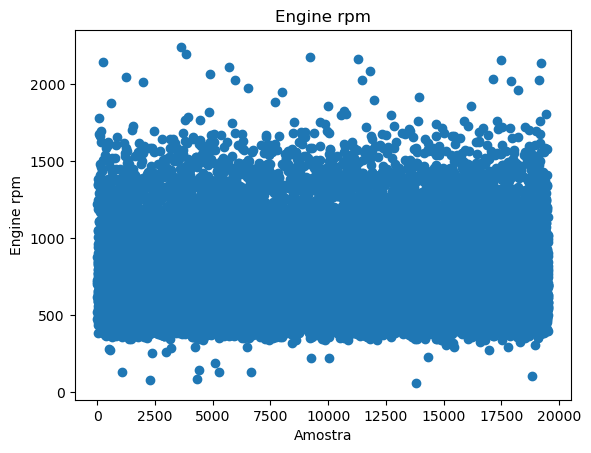

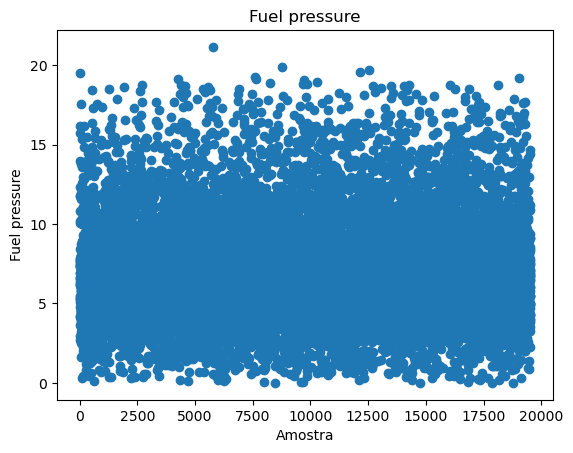

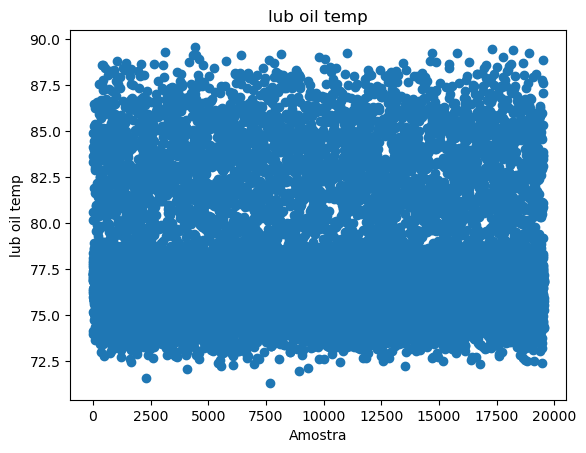

In [83]:
# Vamos plotar algumas colunas do dataframe
columns = ['Engine rpm', 'Fuel pressure', 'lub oil temp'] # Para mais plots basta inserir mais variáveis na lista 'columns'

for column in columns:
    plt.scatter(df.index, df[column])
    plt.title(column)
    plt.xlabel('Amostra')
    plt.ylabel(column)
    plt.show()


In [84]:
# Verificar se existem valores faltantes no dataframe
missing_values = df.isnull().sum()
print('Valores faltantes:')
print(missing_values)

# Identificar se existem linhas duplicadas na base de dados
duplicadas = df[df.duplicated()]
print('Linhas duplicadas:')
print(duplicadas)


Valores faltantes:
Engine rpm          0
Lub oil pressure    0
Fuel pressure       0
Coolant pressure    0
lub oil temp        0
Coolant temp        0
Engine Condition    0
dtype: int64
Linhas duplicadas:
Empty DataFrame
Columns: [Engine rpm, Lub oil pressure, Fuel pressure, Coolant pressure, lub oil temp, Coolant temp, Engine Condition]
Index: []


Não foram encontradas valores faltantes ou linhas duplicadas no dataset


## Regressão Logística

Para a regressão logística não será necessário realizar o procedimento de One Hot Encoding, pois não temos variáveis qualitativas no dataset. Para realizar a regressão logística iremos utilizar a biblioteca statsmodels.

In [85]:
# Para poder rodar o modelo na bibliotecas statsmodels é necessário substituir os espaços nos nomes das colunas por underscores
# Vamos para isso criar uma cópia do DataFrame e chamar de df_input
df_input = df.copy()
df_input.columns = df_input.columns.str.replace(' ', '_')
df_input.head()

# Vamos criar uma lista de colunas com as nossas features e remover o label, que no caso é a coluna 'Engine_Condition'
lista_colunas_modelo = list(df_input.drop(columns=['Engine_Condition']).columns)

# Vamos agora escrever a fórmula do modelo logístico
formula_modelo_engine = 'Engine_Condition ~ ' + ' + '.join(lista_colunas_modelo)
print(formula_modelo_engine)

Engine_Condition ~ Engine_rpm + Lub_oil_pressure + Fuel_pressure + Coolant_pressure + lub_oil_temp + Coolant_temp


In [86]:
# Fit do modelo logístico
modelo_logistico_engine = smf.logit(formula=formula_modelo_engine, data = df_input).fit()

# Print do resumo do modelo
print(modelo_logistico_engine.summary())

Optimization terminated successfully.
         Current function value: 0.608816
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:       Engine_Condition   No. Observations:                19535
Model:                          Logit   Df Residuals:                    19528
Method:                           MLE   Df Model:                            6
Date:                Sat, 26 Oct 2024   Pseudo R-squ.:                 0.07571
Time:                        17:34:11   Log-Likelihood:                -11893.
converged:                       True   LL-Null:                       -12867.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            6.2523      0.431     14.512      0.000       5.408       7.097
Engine_rpm 

In [87]:
# Procedimento stpwise 
from statstests.process import stepwise
step_modelo_logistico_engine = stepwise(modelo_logistico_engine, pvalue_limit=0.05)

Regression type: Logit 

Estimating model...: 
 Engine_Condition ~ Q('Engine_rpm') + Q('Lub_oil_pressure') + Q('Fuel_pressure') + Q('Coolant_pressure') + Q('lub_oil_temp') + Q('Coolant_temp')
Optimization terminated successfully.
         Current function value: 0.608816
         Iterations 5

 No more atributes with p-value higher than 0.05

 Atributes discarded on the process...: 


 Model after stepwise process...: 
 Engine_Condition ~ Q('Engine_rpm') + Q('Lub_oil_pressure') + Q('Fuel_pressure') + Q('Coolant_pressure') + Q('lub_oil_temp') + Q('Coolant_temp') 

                           Logit Regression Results                           
Dep. Variable:       Engine_Condition   No. Observations:                19535
Model:                          Logit   Df Residuals:                    19528
Method:                           MLE   Df Model:                            6
Date:                Sat, 26 Oct 2024   Pseudo R-squ.:                 0.07571
Time:                        17:34:

In [88]:
# Fazer previsões (
probabilidades = modelo_logistico_engine.predict(df_input[lista_colunas_modelo])

# Definir limiar para classificação, sendo que no exemplo será utilizado 0.5
previsoes = (probabilidades >= 0.5).astype(int)

# Gerar a matriz de confusão
matriz_confusao = confusion_matrix(df_input['Engine_Condition'], previsoes)

print("Matriz de Confusão:")
print(matriz_confusao)

Matriz de Confusão:
[[ 2147  5071]
 [ 1530 10787]]


In [89]:
# Extrair os valores da matriz de confusão
TN, FP, FN, TP = matriz_confusao.ravel()

# Calcular as métricas 
accuracy = accuracy_score(df_input['Engine_Condition'], previsoes)
precision = precision_score(df_input['Engine_Condition'], previsoes)
recall = recall_score(df_input['Engine_Condition'], previsoes)
f1 = f1_score(df_input['Engine_Condition'], previsoes)

print("Matriz de Confusão:")
print(matriz_confusao)
print(f"Acurácia: {accuracy}")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")


Matriz de Confusão:
[[ 2147  5071]
 [ 1530 10787]]
Acurácia: 0.6620936780138214
Precisão: 0.6802244923697818
Recall: 0.8757814402857839
F1-Score: 0.7657142857142857
